In [1]:
# x ... number of prey
# y ... number of predators
# alpha: Natural growth rate of prey in the absence of predators.
# beta: Rate at which prey is consumed (interaction).
# delta: Efficiency of turning prey into new predators.
# gamma: Natural death rate of predators in the absence of food.

# dx/dt = alpha*x - beta*x*y
# dy/dt = delta*x*y - gamma*y

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
def lotka_volterra(state, t, alpha, beta, delta, gamma):
    x, y = state

    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y

    return [dxdt, dydt]

In [9]:
alpha = 4.0   # Prey growth rate
beta = 2.0   # Predation rate
delta = 1.0   # Predator reproduction rate
gamma = 1.0   # Predator death rate

# x0 = 10 (prey), y0 = 10 (predators)
initial_state = [10, 10]

t = np.linspace(0, 100, 1000)

In [10]:
# Solve the ODE
solution = odeint(lotka_volterra, initial_state, t, args=(alpha, beta, delta, gamma))
x, y = solution.T # Transpose to unpack into x and y arrays


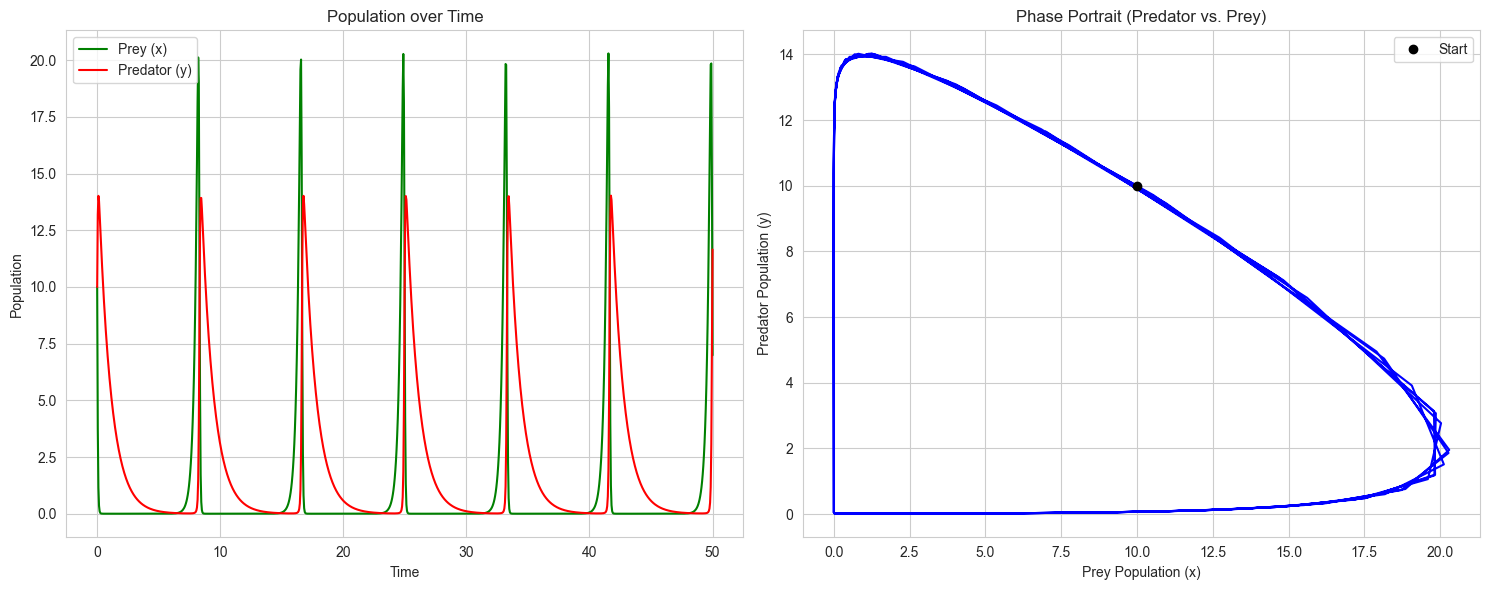

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# --- Plot 1: Time Series ---
ax[0].plot(t, x, 'g-', label='Prey (x)')
ax[0].plot(t, y, 'r-', label='Predator (y)')
ax[0].set_title('Population over Time')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Population')
ax[0].grid(True)
ax[0].legend()

# --- Plot 2: Phase Portrait ---
ax[1].plot(x, y, color='blue')
ax[1].set_title('Phase Portrait (Predator vs. Prey)')
ax[1].set_xlabel('Prey Population (x)')
ax[1].set_ylabel('Predator Population (y)')
ax[1].grid(True)

# Mark the starting point
ax[1].plot(x[0], y[0], 'ko', label='Start')
ax[1].legend()

plt.tight_layout()
plt.show()